<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- VIF(Variance Inflation Factor)를 사용해 독립변수 간의 다중공선성 존재 여부를 확인합니다.
- VIF는 분산팽창인수, 분산팽창요인, 분산팽창지수 등으로 불려집니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- black: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 의미
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

In [4]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# 기술통계 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# 상관관계 확인
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 3.VIF 확인 #1

- VIF룰 사용해 다중공선성 존재 여부를 확인합니다.
- 우선 표준화 없이 진행합니다.

**1) x, y 분리**

- 우선 x, y를 분리합니다.
- 종속변수 y는 당연히 여러 독립변수들로 설명이 되니 VIF 확인 대상에서 제외합니다.
- x에 포함된 독립변수들 만을 대상으로 다중공선성 존재 여부를 확인합니다.

In [7]:
# 데이터 분리
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

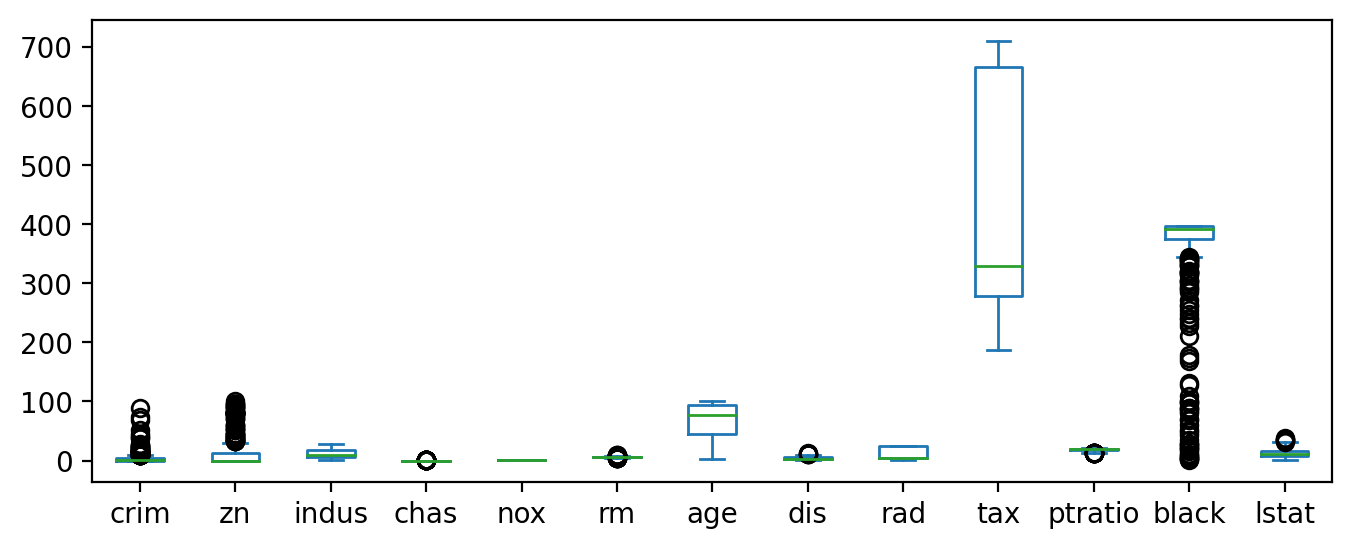

In [8]:
# 데이터 분포 확인
x.plot(kind='box', figsize=(8, 3))
plt.show()

**2) VIF 확인**

- 표준화 없이 VIF를 확인합니다.

$$ \huge VIF_i=\frac{1}{1-R_i^2} $$

- VIF equal to 1 = variables are not correlated
- VIF between 1 and 5 = variables are moderately correlated 
- VIF greater than 5 = variables are highly correlated


In [9]:
# 모듈 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = x.columns 
vif['vif_factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

,feature,vif_factor
0,ptratio,85.029547
1,rm,77.948283
2,nox,73.894947
3,tax,61.227274
4,age,21.386850
5,black,20.104943
6,rad,15.167725
7,dis,14.699652
8,indus,14.485758
9,lstat,11.102025


**3) VIF 시각화**

- VIF를 시각화해 비교합니다.

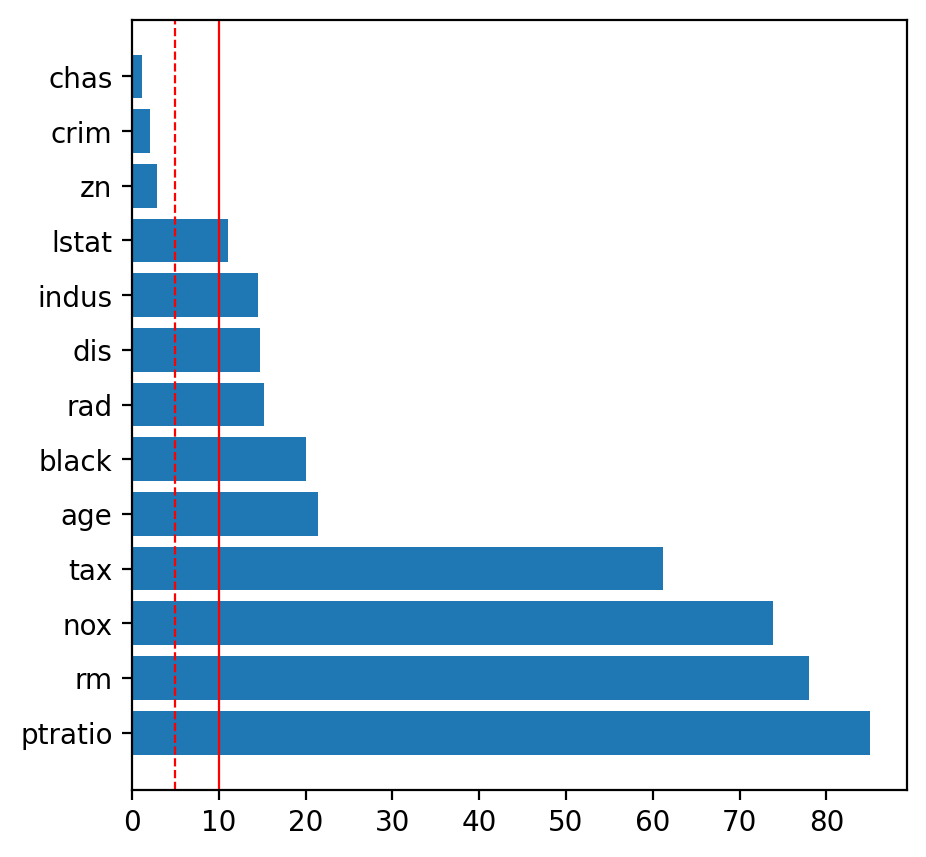

In [10]:
# VIF 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

# 4.VIF 확인#2

- 표준화 진행 후 VIF를 다시 확인합니다.

**1) 데이터 분리**

- 다른 방법으로 확인하기 위해 x, y를 다시 분리합니다.

In [11]:
# 데이터 분리
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 표준화**

- 데이터 범위를 일관되게 가지도록 표준화를 진행합니다.

$$ \large x_{new}=\frac{x-mean(x)}{stdev(x)}$$

In [12]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
col_x = list(x)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=col_x)

In [13]:
# 기술통계
# x.describe()
x.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099
min,-0.41978,-0.48772,-1.55784,-0.27260,-1.46588,-3.88025,-2.33544,-1.26707,-0.98284,-1.31399,-2.70738,-3.90719,-1.53113
25%,-0.41097,-0.48772,-0.86769,-0.27260,-0.91303,-0.56863,-0.83745,-0.80569,-0.63796,-0.76758,-0.48804,0.20507,-0.79942
50%,-0.39067,-0.48772,-0.21110,-0.27260,-0.14422,-0.10847,0.31738,-0.27932,-0.52300,-0.46467,0.27486,0.38119,-0.18125
75%,0.00740,0.04877,1.01600,-0.27260,0.59868,0.48277,0.90680,0.66237,1.66125,1.53093,0.80658,0.43365,0.60302
max,9.93393,3.80423,2.42257,3.66840,2.73235,3.55504,1.11749,3.96052,1.66125,1.79819,1.63883,0.44105,3.54877


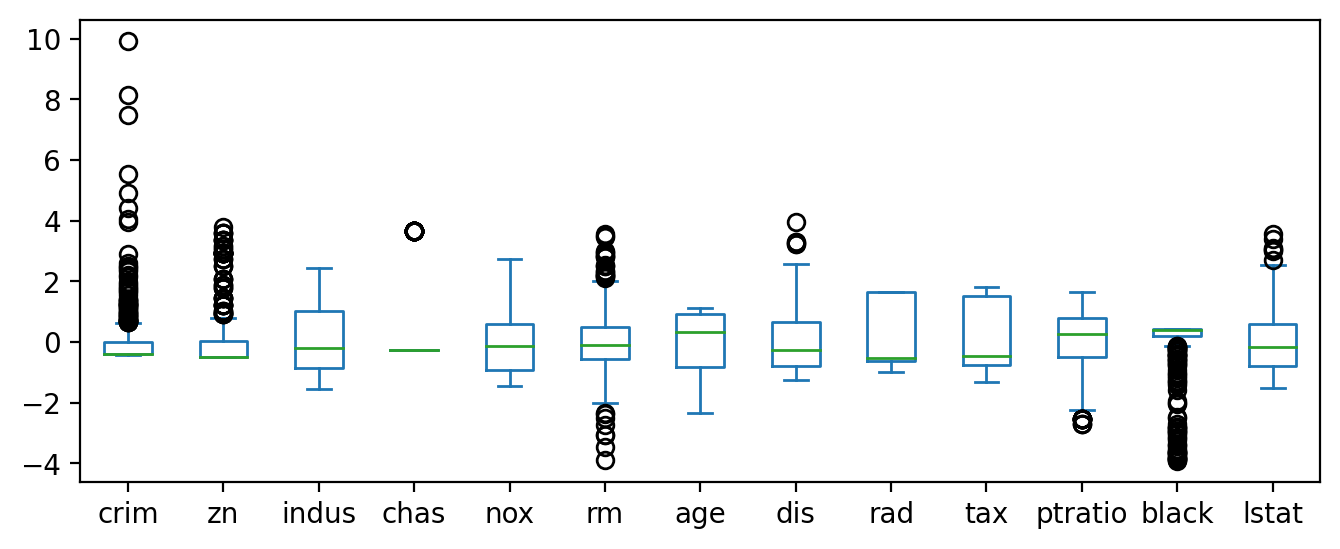

In [14]:
# 데이터 분포
x.plot(kind='box', figsize=(8, 3))
plt.show()

**3) VIF 확인**

- 표준화 된 데이터를 대상으로 VIF를 다시 확인합니다.

In [15]:
# 빈 데이터프레임 만들기
vif = pd.DataFrame()

# VIF 확인 및 기록
vif['feature'] = x.columns 
vif['vif_factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# VIF 기준으로 정렬
vif.sort_values(by='vif_factor', ascending=False, inplace=True)
vif.reset_index(drop=True, inplace=True)

# 확인
vif

,feature,vif_factor
0,tax,9.008554
1,rad,7.484496
2,nox,4.393720
3,indus,3.991596
4,dis,3.955945
5,age,3.100826
6,lstat,2.941491
7,zn,2.298758
8,rm,1.933744
9,ptratio,1.799084


**4) VIF 시각화**

- VIF를 시각화해 비교합니다.

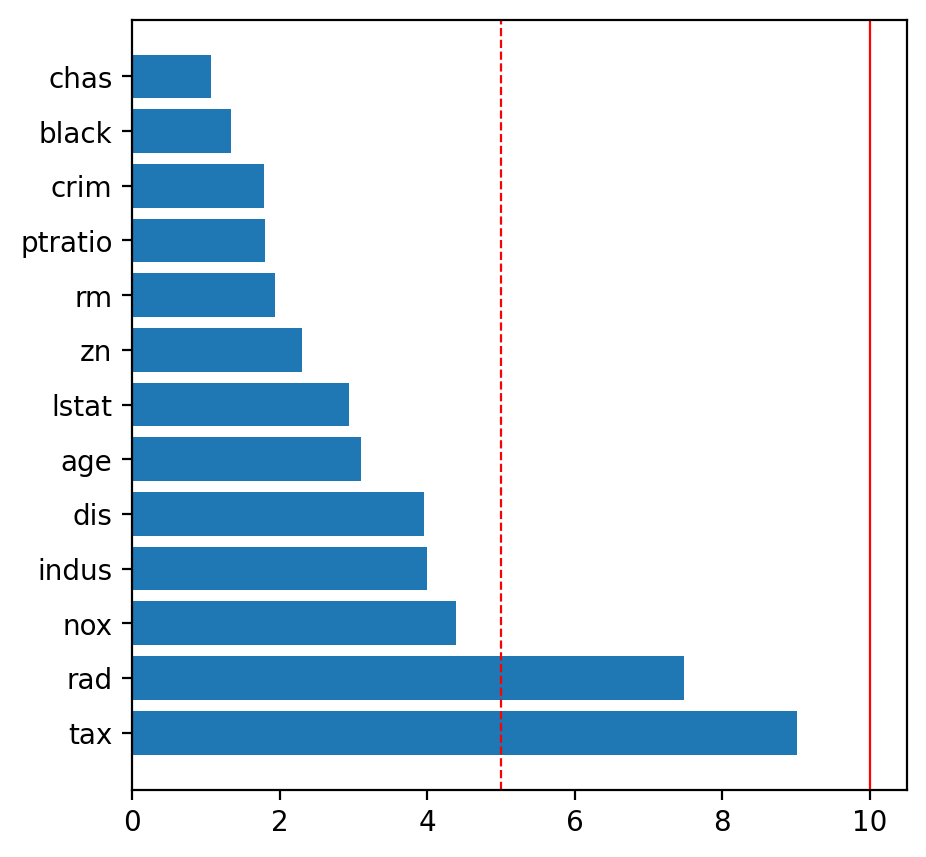

In [16]:
# VIF 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=vif['feature'], width=vif['vif_factor'])
plt.axvline(5, color='r', linestyle='--', linewidth=0.8)
plt.axvline(10, color='r', linestyle='-', linewidth=0.8)
plt.show()

# 5.VIF 직접 계산

- Linear Regression 알고리즘을 사용해 모델을 만들어 1 / (1-R2) 공식으로 VIF를 확인합니다.
- tax 변수에 대해서만 확인합니다.

In [17]:
# 데이터 분리
target = 'tax'
x_train = x.drop(target, axis=1)
y_train = x.loc[:, target]

In [18]:
# 모델링
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
# VIF 확인
print('R2:', model.score(x_train, y_train))
print('VIF:', 1/(1-model.score(x_train, y_train)))

R2: 0.888994392905119
VIF: 9.00855394759707
